# Домашнее задание

Реализовать обучение линейной регрессии для задачи boston house prices (https://www.kaggle.com/vikrishnan/boston-house-prices) с использованием torch’а

** Реализоыать наивный баесовский классификатор для MNIST (взяв всего 2 цифры “1” и “2”) сравнить с sclearn’овским


# import libraries

In [377]:
import torch
from torch.utils.data import TensorDataset, DataLoader

from sklearn.datasets import load_boston
import pandas as pd 
import numpy as np

# I

# helpers

# loading data

In [378]:
boston = load_boston()

In [379]:
data = boston['data']
target = boston['target']

In [380]:
data.shape, target.shape

((506, 13), (506,))

In [381]:
# to tensor
data  = torch.tensor(data).float()[:-10]
target = torch.tensor(target).float()[:-10]

In [382]:
X_val = torch.tensor(data).float()[-10:]
y_val = torch.tensor(target).float()[-10:]

<ipython-input-382-36118362919a>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(data).float()[-10:]
<ipython-input-382-36118362919a>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_val = torch.tensor(target).float()[-10:]


# dataset creation

In [383]:
batch_size = 10
dataset = TensorDataset(data, target)

# Randomly reading mini-batches
data_iter = DataLoader(dataset, batch_size, shuffle=True)

# Read a batch to see how it works
for X, y in data_iter:
    print(X,y)
    break

tensor([[2.8955e-01, 0.0000e+00, 1.0590e+01, 0.0000e+00, 4.8900e-01, 5.4120e+00,
         9.8000e+00, 3.5875e+00, 4.0000e+00, 2.7700e+02, 1.8600e+01, 3.4893e+02,
         2.9550e+01],
        [2.0090e-02, 9.5000e+01, 2.6800e+00, 0.0000e+00, 4.1610e-01, 8.0340e+00,
         3.1900e+01, 5.1180e+00, 4.0000e+00, 2.2400e+02, 1.4700e+01, 3.9055e+02,
         2.8800e+00],
        [7.0226e+00, 0.0000e+00, 1.8100e+01, 0.0000e+00, 7.1800e-01, 6.0060e+00,
         9.5300e+01, 1.8746e+00, 2.4000e+01, 6.6600e+02, 2.0200e+01, 3.1998e+02,
         1.5700e+01],
        [1.4932e-01, 2.5000e+01, 5.1300e+00, 0.0000e+00, 4.5300e-01, 5.7410e+00,
         6.6200e+01, 7.2254e+00, 8.0000e+00, 2.8400e+02, 1.9700e+01, 3.9511e+02,
         1.3150e+01],
        [2.5941e+01, 0.0000e+00, 1.8100e+01, 0.0000e+00, 6.7900e-01, 5.3040e+00,
         8.9100e+01, 1.6475e+00, 2.4000e+01, 6.6600e+02, 2.0200e+01, 1.2736e+02,
         2.6640e+01],
        [3.1533e-01, 0.0000e+00, 6.2000e+00, 0.0000e+00, 5.0400e-01, 8.2660e+00,

# creating model

In [384]:
model = torch.nn.Sequential(torch.nn.Linear(13,1))

In [385]:
for m in model.modules():
    if isinstance(m, torch.nn.Conv2d):
        torch.nn.init.normal(m.weight, mean=0, std=0.01)
        torch.nn.init.constant(m.bias, 0)

In [386]:
model[0].weight.data.requires_grad_(True)

tensor([[ 0.0202,  0.1492, -0.1038,  0.1236,  0.0328, -0.1202, -0.0739, -0.1996,
         -0.0642,  0.1251,  0.0479, -0.2722, -0.0577]], requires_grad=True)

In [387]:
model[0].bias.data.requires_grad_(True)

tensor([0.1446], requires_grad=True)

In [388]:
loss = torch.nn.MSELoss(reduction='mean')

In [389]:
trainer = torch.optim.Adam(model.parameters(), lr=0.001)

# training

In [390]:
num_epochs = 100
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        trainer.zero_grad()
        l = loss(model.forward(X).reshape(-1), y)
        l.backward()
        trainer.step()
    l = loss(model.forward(data).reshape(-1), target)
    print('epoch %d, loss %f' % (epoch, l.item()))
    print('w',model[0].weight.data)
    print('b',model[0].bias.data)

epoch 1, loss 3312.565674
w tensor([[ 0.0248,  0.1868, -0.0645,  0.1516,  0.0754, -0.0764, -0.0320, -0.1548,
         -0.0306,  0.1660,  0.0912, -0.2273, -0.0169]])
b tensor([0.1882])
epoch 2, loss 2270.008789
w tensor([[-0.0097,  0.2191, -0.0525,  0.1711,  0.0994, -0.0474, -0.0103, -0.1215,
         -0.0393,  0.1810,  0.1176, -0.1954, -0.0024]])
b tensor([0.2162])
epoch 3, loss 1858.005615
w tensor([[-0.0500,  0.2432, -0.0616,  0.1845,  0.1086, -0.0303, -0.0047, -0.0974,
         -0.0732,  0.1745,  0.1308, -0.1732, -0.0062]])
b tensor([0.2317])
epoch 4, loss 1517.182617
w tensor([[-0.0858,  0.2667, -0.0750,  0.2006,  0.1150, -0.0152, -0.0019, -0.0754,
         -0.1078,  0.1639,  0.1413, -0.1528, -0.0144]])
b tensor([0.2450])
epoch 5, loss 1218.885254
w tensor([[-0.1203,  0.2852, -0.0900,  0.2147,  0.1185, -0.0025, -0.0019, -0.0558,
         -0.1426,  0.1497,  0.1495, -0.1344, -0.0255]])
b tensor([0.2559])
epoch 6, loss 961.955994
w tensor([[-0.1545,  0.3031, -0.1047,  0.2282,  0.1227,

In [391]:
model[0].weight.data

tensor([[-0.0804,  0.0967, -0.1666,  1.3789,  0.4649,  0.7236,  0.1021, -0.0741,
         -0.1147,  0.0107,  0.3301,  0.0315, -0.6996]])

In [392]:
model[0].bias.data

tensor([0.6991])

# Validation

In [393]:
model[0].weight.data

tensor([[-0.0804,  0.0967, -0.1666,  1.3789,  0.4649,  0.7236,  0.1021, -0.0741,
         -0.1147,  0.0107,  0.3301,  0.0315, -0.6996]])

In [396]:
for i in range (0,X_val.shape[0]):
    y_pred = model(X_val[i]).reshape(-1)
    l = y_pred - y_val[i]   
    print('y_pred %d, y_true %s, pred-true diff %f' % (y_pred.item(), y_val[i].item(), l.item()))

y_pred 22, y_true 19.100000381469727, pred-true diff 3.634644
y_pred 22, y_true 20.600000381469727, pred-true diff 1.695187
y_pred 23, y_true 15.199999809265137, pred-true diff 8.019097
y_pred 18, y_true 7.0, pred-true diff 11.023733
y_pred 12, y_true 8.100000381469727, pred-true diff 4.853125
y_pred 24, y_true 13.600000381469727, pred-true diff 10.461102
y_pred 25, y_true 20.100000381469727, pred-true diff 5.896561
y_pred 22, y_true 21.799999237060547, pred-true diff 0.935015
y_pred 20, y_true 24.5, pred-true diff -3.884275
y_pred 16, y_true 23.100000381469727, pred-true diff -7.020226


# II **

Реализоыать наивный баесовский классификатор для MNIST (взяв всего 2 цифры “1” и “2”) сравнить с sclearn’овским

# import libraries

In [570]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits


from sklearn.naive_bayes import MultinomialNB


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

%matplotlib inline
from d2l import torch as d2l
import math
import torch
import torchvision
d2l.use_svg_display()

# helpers

# load data

In [520]:
digits = load_digits()

X = digits.data
y = digits.target

#Select only the digit 4 and 9 images
X = X[np.logical_or(y == 1, y == 2)]
y = y[np.logical_or(y == 1, y == 2)]

# verify selection
np.unique(y)
#array([1, 2])

# Now split them
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=200, test_size=100)

## sklearn

In [444]:
# Create the Multinomial Naive Bayes Classifier
clf = MultinomialNB()

In [449]:
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)

# Calculate the accuracy of the prediction
print("Accuracy = {} %".format(accuracy_score(y_test, y_predicted)*100))

# Cross validate the scores
print("Classification Report \n {}".format(classification_report(y_test, y_predicted, labels=range(1,3))))

Accuracy = 98.0 %
Classification Report 
               precision    recall  f1-score   support

           1       0.96      1.00      0.98        50
           2       1.00      0.96      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



## pytorch

In [585]:
data_transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor()])

In [586]:
mnist_train = torchvision.datasets.MNIST('.', train=True, transform=data_transform, download=True)
mnist_test  = torchvision.datasets.MNIST('.', train=False, transform=data_transform, download=True)

In [587]:
images = torch.stack([mnist_train[i][0] for i in range(2,38) if mnist_train[i][1] == 1 or mnist_train[i][1] == 2], 
                     dim=1).squeeze(0)
labels = torch.tensor([mnist_train[i][1] for i in range(2,38) if mnist_train[i][1] == 1 or mnist_train[i][1] == 2])
images.shape, labels.shape

(torch.Size([10, 28, 28]), torch.Size([10]))

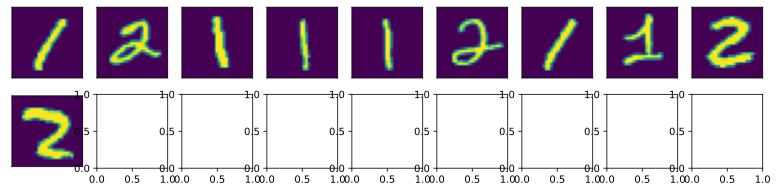

In [588]:
d2l.show_images(images, 2, 9);

In [589]:
X = torch.stack([mnist_train[i][0] for i in range(len(mnist_train)) if mnist_train[i][1] == 1 or mnist_train[i][1] == 2], 
                dim=1).squeeze(0)
Y = torch.tensor([mnist_train[i][1] for i in range(len(mnist_train)) if mnist_train[i][1] == 1 or mnist_train[i][1] == 2])

In [590]:
n_y = torch.zeros(3)
for y in range(3):
    n_y[y] = (Y == y).sum()
P_y = n_y / n_y.sum()
P_y

tensor([0.0000, 0.5309, 0.4691])

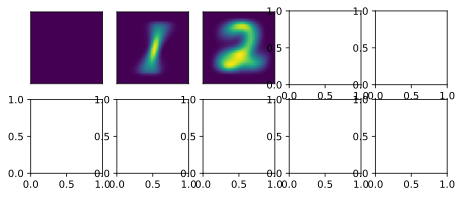

In [591]:
n_x = torch.zeros((3, 28, 28))
for y in range(3):
    n_x[y] = torch.tensor(X.numpy()[Y.numpy() == y].sum(axis=0))
P_xy = (n_x + 1) / (n_y + 1).reshape(3, 1, 1)

d2l.show_images(P_xy, 2, 5);

In [592]:
def bayes_pred(x):
    x = x.unsqueeze(0)  # (28, 28) -> (1, 28, 28)
    p_xy = P_xy * x + (1 - P_xy)*(1 - x)
    p_xy = p_xy.reshape(3, -1).prod(dim=1)  # p(x|y)
    return p_xy * P_y

image, label = mnist_test[0]
bayes_pred(image)

tensor([0., 0., 0.])

In [593]:
a = 0.1
print('underflow:', a**784)
print('logarithm is normal:', 784*math.log(a))

underflow: 0.0
logarithm is normal: -1805.2267129073316


In [594]:
log_P_xy = torch.log(P_xy)
log_P_xy_neg = torch.log(1 - P_xy)
log_P_y = torch.log(P_y)

def bayes_pred_stable(x):
    x = x.unsqueeze(0)  # (28, 28) -> (1, 28, 28)
    p_xy = log_P_xy * x + log_P_xy_neg * (1 - x)
    p_xy = p_xy.reshape(3, -1).sum(axis=1)  # p(x|y)
    return p_xy + log_P_y

py = bayes_pred_stable(image)
py

tensor([      nan, -300.4919, -252.6362])

In [595]:
py.argmax(dim=0) == label

tensor(False)

In [597]:
def predict(X):
    return [bayes_pred_stable(x).argmax(dim=0).type(torch.int32).item() 
            for x in X]

X = torch.stack([mnist_train[i][0] for i in range(3,38) if mnist_train[i][1] == 1 or mnist_train[i][1] == 2], dim=1).squeeze(0)
y = torch.tensor([mnist_train[i][1] for i in range(3,38) if mnist_train[i][1] == 1 or mnist_train[i][1] == 2])
preds = predict(X)

In [599]:
X = torch.stack([mnist_train[i][0] for i in range(len(mnist_test)) if mnist_train[i][1] == 1 or mnist_train[i][1] == 2], 
                dim=1).squeeze(0)
y = torch.tensor([mnist_train[i][1] for i in range(len(mnist_test)) if mnist_train[i][1] == 1 or mnist_train[i][1] == 2])
preds = torch.tensor(predict(X), dtype=torch.int32)
float((preds == y).sum()) / len(y)  # Validation accuracy

0.09584513692162418